In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
def result(centre):
    # Make 10,000 rows worth of data with two features representing three
    # clusters, each having a standard deviation of 1.
    X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

    #Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

    ## Mean-Shift

    from sklearn.cluster import MeanShift, estimate_bandwidth

    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))

    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,labels))

    ## Spectral clustering

    from sklearn.cluster import SpectralClustering

    # We know we're looking for three clusters.
    n_clusters=3

    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)

    #Predicted clusters.
    predict=sc.fit_predict(X_train)

    #Graph results.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))

    ## Affinity propagation

    from sklearn.cluster import AffinityPropagation
    from sklearn import metrics

    # Declare the model and fit it in one statement.
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation().fit(X_train)
    print('Done')

    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))

    from itertools import cycle

    plt.figure(1)
    plt.clf()

    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()

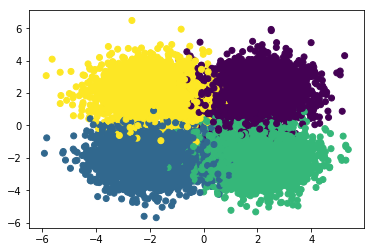

Number of estimated clusters: 4


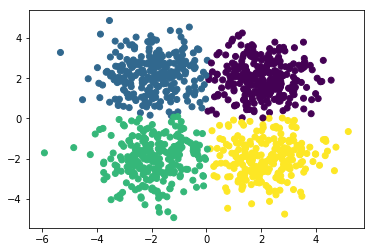

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0


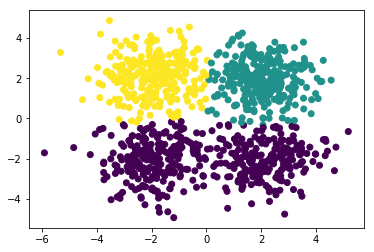

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        1  264    8
1      231    0    8
2      229    9    0
3        5    2  243
Done
Estimated number of clusters: 25


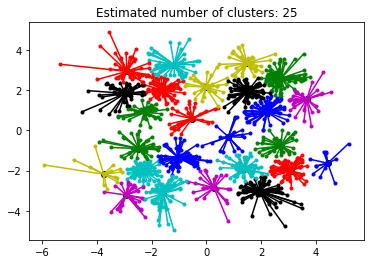

In [3]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2]]
result(centers)

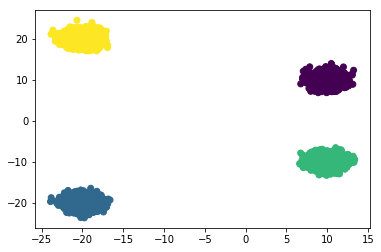

Number of estimated clusters: 4


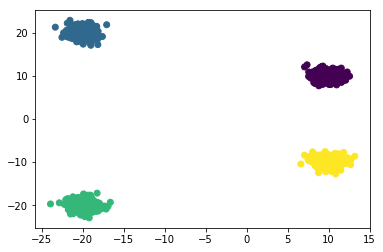

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0    0  239    0
2        0    0    0  238
3        0  250    0    0


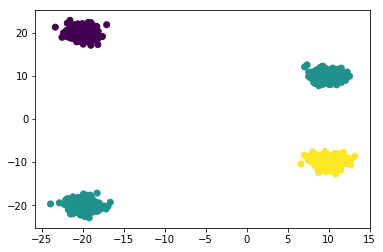

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  273    0
1        0  239    0
2        0    0  238
3      250    0    0
Done
Estimated number of clusters: 761


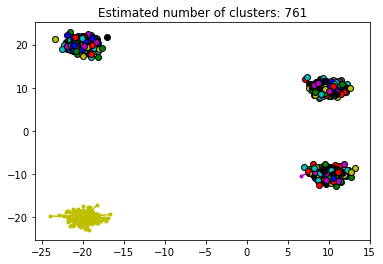

In [4]:
# The coordinates of the centers of our blobs.
centers = [[10, 10], [-20, -20], [10, -10], [-20, 20]]
result(centers)

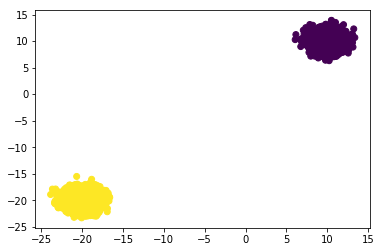

Number of estimated clusters: 2


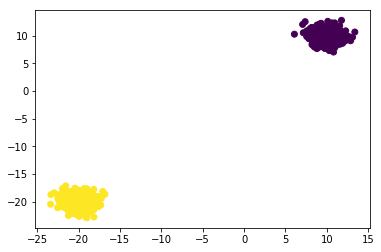

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        0  488


c:\program files\python37\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\program files\python37\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


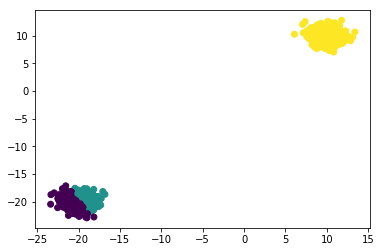

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0    0  512
1      263  225    0
Done
Estimated number of clusters: 34


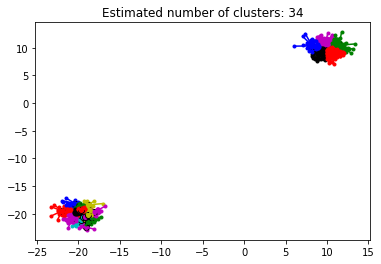

In [5]:
# The coordinates of the centers of our blobs.
centers = [[10, 10], [-20, -20]]
result(centers)

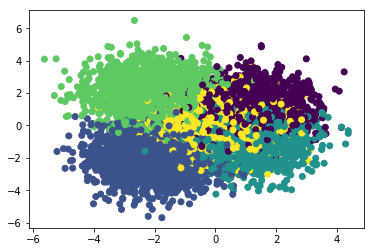

Number of estimated clusters: 1


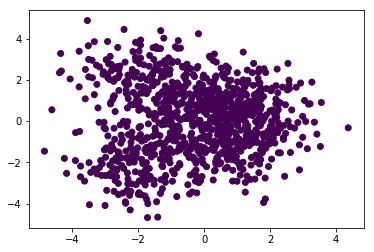

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      221
1      203
2      191
3      187
4      198


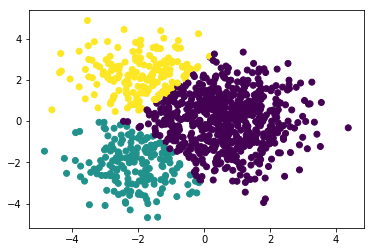

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      213    0    8
1       33  168    2
2      184    6    1
3       28    2  157
4      184    7    7
Done
Estimated number of clusters: 127


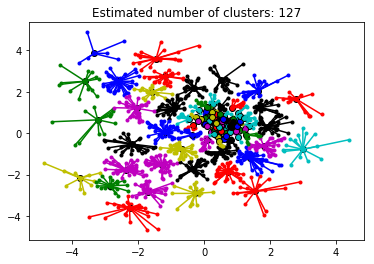

In [6]:
# The coordinates of the centers of our blobs.
centers = [[1, 1], [-2, -2], [1, -1], [-2, 2], [0,0]]
result(centers)